In [33]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import math
import random
import DS._6probability as pr
import DS._5statistics as stat
import DS._4linear_algebra as la
%matplotlib inline

Exploring one Dimensional Data

In [22]:
def bucketsize(point, bucket_size):
    """floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points, bucket_size):
    """buckets the points and counts how many in each bucket"""
    return Counter(bucketsize(point, bucket_size)
                   for point in points)

def plot_histogram(points, bucket_size, title=''):
    histogram = make_histogram(points, bucket_size)
    plt.bar(list(histogram.keys()), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

In [20]:
random.seed(0)

uniform = [200 * random.random() - 100 
           for _ in range(10000)]

normal = [57 * pr.inverse_normal_cdf(random.random()) 
          for _ in range(10000)]

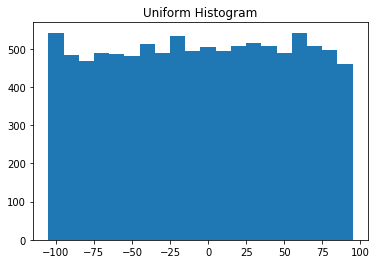

In [23]:
plot_histogram(uniform, 10, "Uniform Histogram")

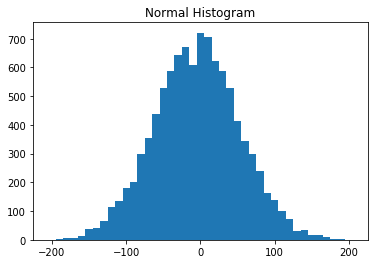

In [24]:
plot_histogram(normal, 10, "Normal Histogram")

Two dimensions

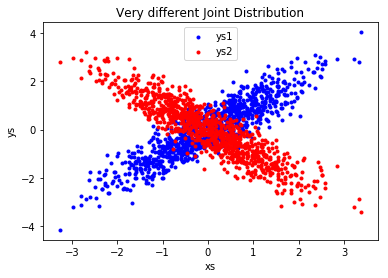

In [26]:
def random_normal():
    """returns a random draw from a standard normal distribution"""
    return pr.inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

plt.scatter(xs, ys1, marker='.', color='blue', label='ys1')
plt.scatter(xs, ys2, marker='.', color='red', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title('Very different Joint Distribution')
plt.show()

In [31]:
print(stat.correlation(xs, ys1)) #0.9
print(stat.correlation(xs, ys2)) #-0.9

0.8993142508350331
-0.9021122671081783


In [34]:
def correlation_matrix(data):
    """returns the num_columns x num_columns matrix whose (i,j)th entry
    is the correlation between columns i and j of data"""
    _, num_columns = la.shape(data)
    def matrix_entry(i, j):
        return stat.correlation(la.get_column(data, i), 
                                la.get_column(A,j))
    return la.make_matrix(num_columns, num_columns, matrix_entry)

Cleaning and Munging